- `pip install autoviz`

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Class will start at 6:05 PM

In the meantime... fun fact!

- AutoViz: Automatically Visualize any dataset, any size with a single line of code 🤯🤯🤯

In [1]:
! pip install autoviz

Shape of your Data Set loaded: (1338, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
charges,1337,float64,0,0.000000,99.925262,0,skewed: cap or drop outliers
bmi,548,float64,0,0.000000,40.956652,0,
age,47,int64,0,0.000000,3.512706,0,
children,6,int64,0,0.000000,0.448430,0,
region,4,object,0,0.000000,0.298954,324,
sex,2,object,0,0.000000,0.149477,662,
smoker,2,object,0,0.000000,0.149477,274,


    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 3


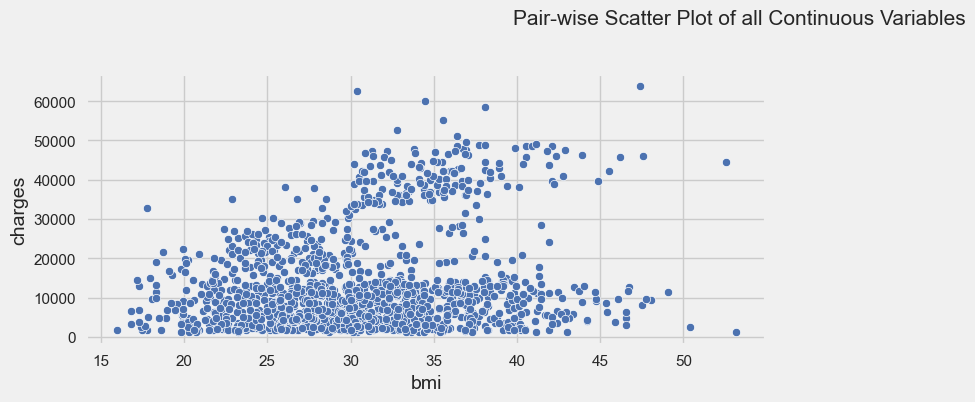

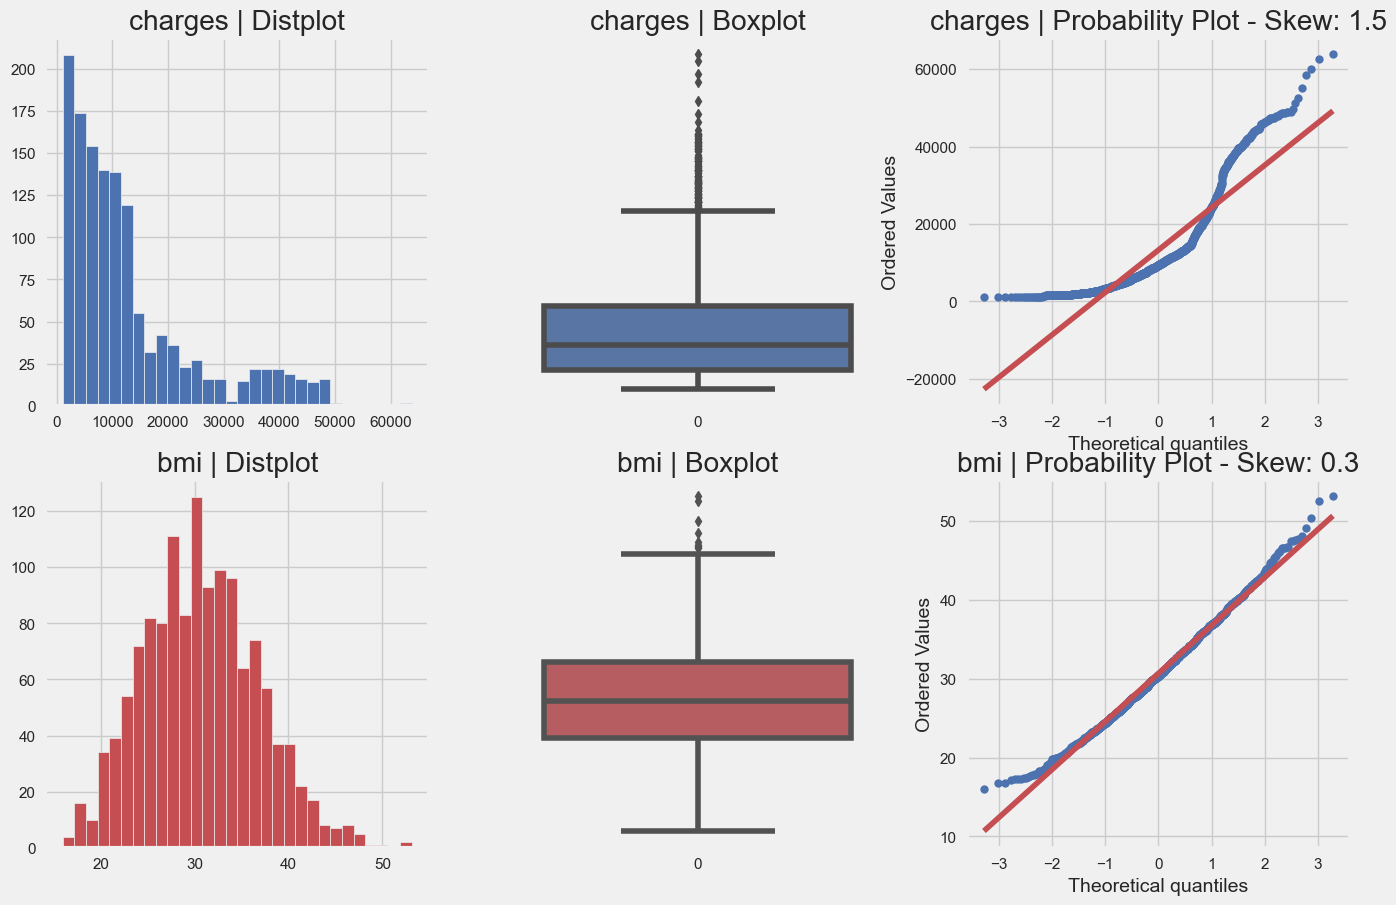

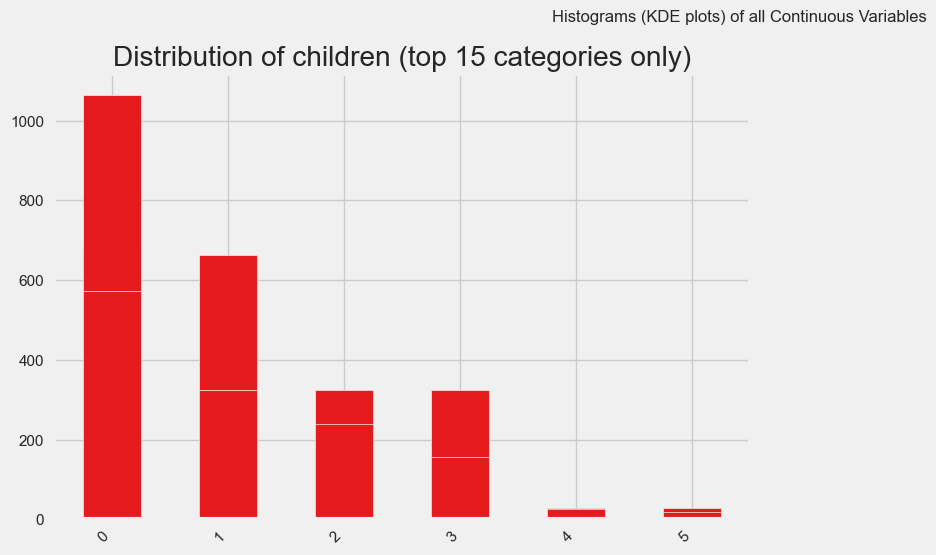

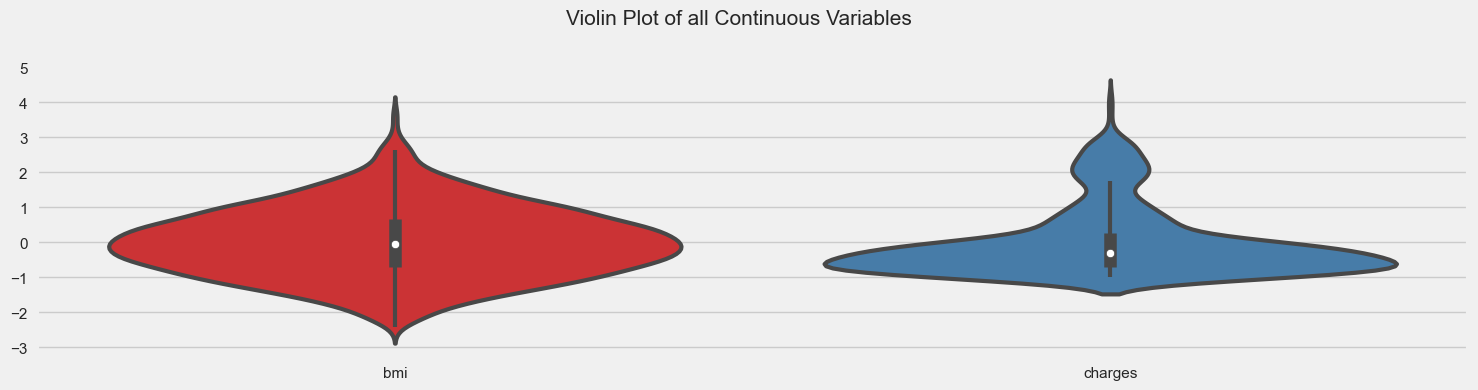

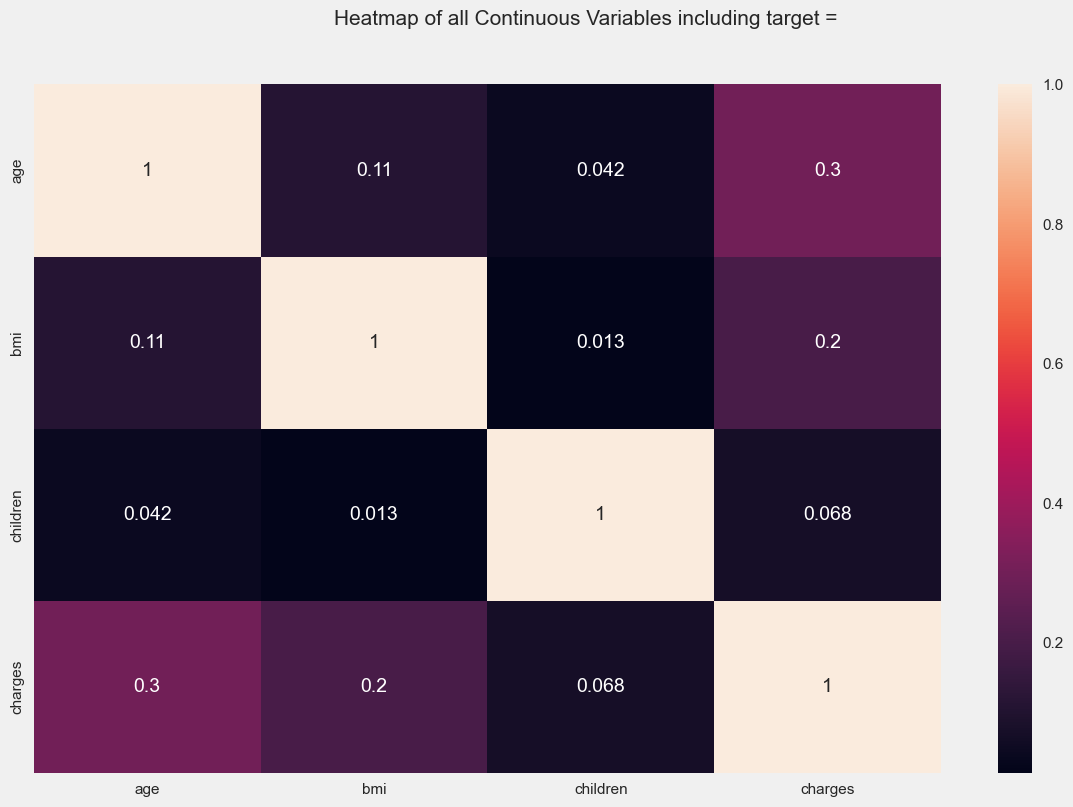

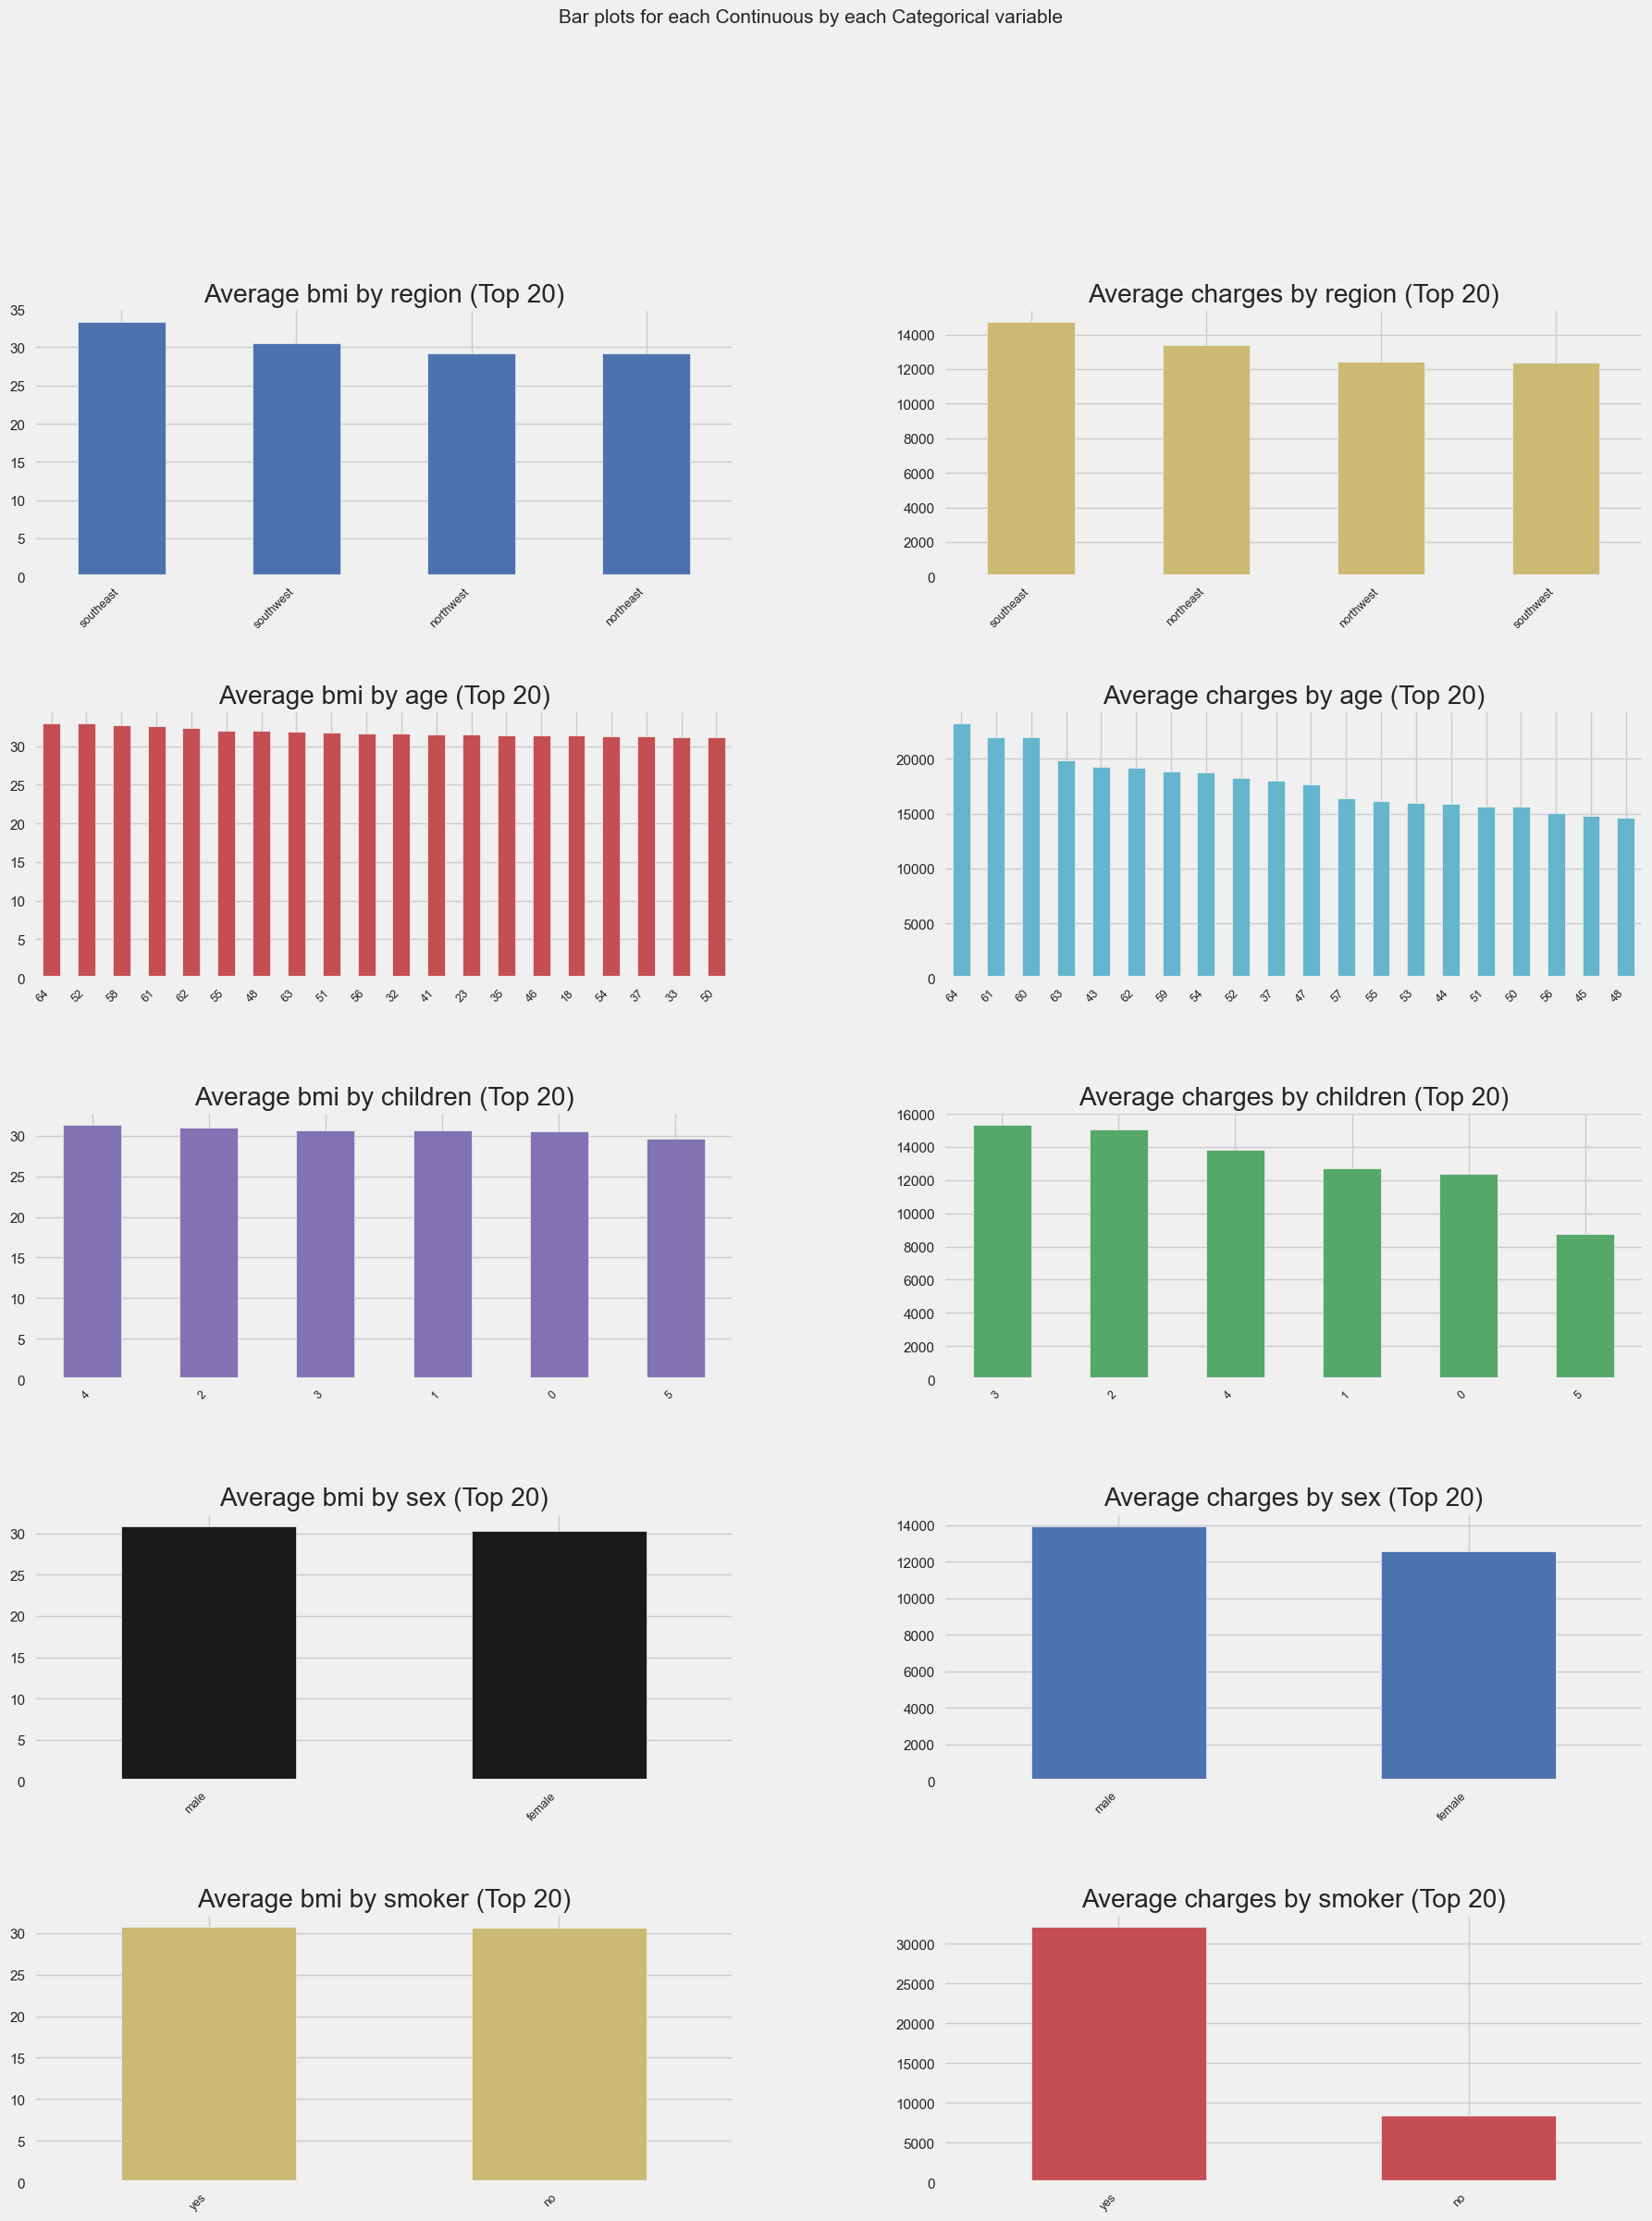

All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [2]:
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt

AV = AutoViz_Class()

filepath = '../data/insurance.csv'

%matplotlib inline

df = AV.AutoViz(filepath)

# Week 6: Ensemble models and model selection/optimization
### Intro to Machine Learning | Professional Certificate course 

Viviana Marquez,  M.Sc.<br>
March 29, 2023

<br>

<img src='../img/all/di.jpeg' style='width:500px; float: left; margin: 0px 30px 15px 0px'>

# 🚀 Today's agenda

**Part 1:**

- Ensemble Learning
    - Voting classifiers
    - Bagging
    - Boosting
    - Stacking

# 🚀 Today's agenda

**Part 2:**

- Model selection and optimization
    - Hyperparameter tuning
        - Cross-Validation
        - Grid Search

# ⏪ Last class recap

- Classification models continuation 
    - Logistic regression
    - Support Vector Machines (SVM)
    - Naive-Bayes
    
- Non-parametric models
    - KNN
    - Decision trees

### Conda environment commands

- `conda activate IntroML`
    - Launch `jupyter notebook`
    
    
### Alternative

Google Colab: https://colab.research.google.com/

# 🚀 Part 1

# ❇️ Ensemble Learning

# Decision trees

<br>
<center>
    <img src='../img/class_5/dt.gif' style='height:350px; float: center; margin: 0px 0px 0px 0px'>
</center>

- It is an algorithm that can be used for both classification and regression
- The goal is to create a model that predicts the value of the target variable by learning simple decision rules

# Decision trees


### 👍 Pros 

- The predictions can be interpreted

### 👎 Cons

- Prone to overfitting
- Unstable, but that can be solved with an ensemble model

<center>
    <img src='../img/class_5/spoiler.jpg' style='height:650px; float: center; margin: 0px 0px 0px 0px'>
</center>

# Random forests 

<center>
    <img src='../img/class_5/rf.png' style='height:350px; float: center; margin: 0px 0px 0px 0px'>
</center>

In [9]:
import numpy as np
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

In [10]:
X = pd.DataFrame(iris.data[:,:2])
X.columns = iris.feature_names[:2]
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [11]:
y = pd.DataFrame(iris.target)
y.colums = ['target']
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Intialize the classfier
dt = DecisionTreeClassifier()

# Train model
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)

# Get results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.40      0.44      0.42         9
           2       0.55      0.55      0.55        11

    accuracy                           0.63        30
   macro avg       0.65      0.63      0.64        30
weighted avg       0.65      0.63      0.64        30



# Let's go back to our real estate agent

- The real estate agent predicts a house price in their head by visiting lots of houses in SF and taking the average of comp places

- Downside: less precise house predictions

- Hmm...can we think of another way to average the price? 🤔 

# Wisdom of the crowd

- Recruit multiple real estate agents to build house price models in their heads by visiting lots of houses; then each agent can estimate prices of unvisited houses

- An agent's prediction might not be accurate: the prediction for one house might be too low but a for another house might be too high

- Averaging all agents’ predictions is better than the prediction of a single agent

<img src='../img/class_6/this2.png' style='width:250px; float: left; margin: 0px 30px 15px 0px'> <b>Ensemble Learning!</b>

# Ensemble Learning

Aggregating the predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor.

Types of ensemble methods:

- Voting classifiers

- Bagging and Pasting

- Boosting

- Stacking

##  Voting classifiers

<br>
<center>
    <img src='../img/class_6/voting.png' style='height:350px; float: center; margin: 0px 0px 0px 0px'>
</center>

- Train a few classifiers and aggregate their predictions: Predict the class that gets the most votes
- Even if each classifier is a *weak learner*, the ensemble can still be a *strong learner*
- Needs: Sufficient weak learners and sufficiently diverse

In [17]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize classifiers
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
nb = MultinomialNB()
logreg = LogisticRegression()
svm = SVC(kernel='sigmoid')

# Train models
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict 
y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Get results
print(f"Classification report for Decision Tree")
print(classification_report(y_test, y_pred_dt))

print(f"Classification report for KNN")
print(classification_report(y_test, y_pred_knn))

print(f"Classification report for Naive-Bayes")
print(classification_report(y_test, y_pred_nb))

print(f"Classification report for Logistic Regression")
print(classification_report(y_test, y_pred_logreg))

print(f"Classification report for Support Vector Machine")
print(classification_report(y_test, y_pred_svm))

Classification report for Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.40      0.44      0.42         9
           2       0.55      0.55      0.55        11

    accuracy                           0.63        30
   macro avg       0.65      0.63      0.64        30
weighted avg       0.65      0.63      0.64        30

Classification report for KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.58      0.78      0.67         9
           2       0.75      0.55      0.63        11

    accuracy                           0.77        30
   macro avg       0.78      0.77      0.77        30
weighted avg       0.78      0.77      0.76        30

Classification report for Naive-Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.

In [19]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('Decision Tree', dt),
                                          ('KNN', knn),
                                          ('Naive-Bayes', nb),
                                          ('Logistic Regression', logreg),
                                          ('Support Vector Machine', svm)],
                              voting='hard') # hard: majority vote

In [20]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier(n_neighbors=3)),
                             ('Naive-Bayes', MultinomialNB()),
                             ('Logistic Regression', LogisticRegression()),
                             ('Support Vector Machine', SVC(kernel='sigmoid'))])

In [21]:
y_pred_voting_clf = voting_clf.predict(X_test)

In [22]:
print("Classification report for Voting Classifier")
print(classification_report(y_test, y_pred_voting_clf))

Classification report for Voting Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.53      0.89      0.67         9
           2       0.80      0.36      0.50        11

    accuracy                           0.73        30
   macro avg       0.78      0.75      0.72        30
weighted avg       0.79      0.73      0.72        30



##  Bagging (bootstrap aggregating) and pasting

<br>
<center>
    <img src='../img/class_6/bagging.png' style='height:350px; float: center; margin: 0px 0px 0px 0px'>
</center>

- Use the same classifier for each predictor, but train them on different random subsets of the training set

- Bagging: Sampling is performed **with** replacement

- Pasting: Sampling is performed **without** replacement

In [24]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(dt, n_estimators=500)

bag_clf.fit(X_train, y_train)
y_pred_bag_clf = bag_clf.predict(X_test)

print("Classification report for Decision Tree")
print(classification_report(y_test, y_pred_dt))

print("Classification report for Bagging Classifier")
print(classification_report(y_test, y_pred_bag_clf))

Classification report for Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.40      0.44      0.42         9
           2       0.55      0.55      0.55        11

    accuracy                           0.63        30
   macro avg       0.65      0.63      0.64        30
weighted avg       0.65      0.63      0.64        30

Classification report for Bagging Classifier
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.60      0.67      0.63         9
           2       0.73      0.73      0.73        11

    accuracy                           0.77        30
   macro avg       0.78      0.76      0.77        30
weighted avg       0.78      0.77      0.77        30



##  Example of bagging: Random Forest

- Ensemble of Decision Trees (usually through bagging)

<center>
    <img src='../img/class_5/rf.png' style='height:350px; float: center; margin: 0px 0px 0px 0px'>
</center>

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Classification report for Random Forest")
print(classification_report(y_test, y_pred_rf))

Classification report for Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.67      0.67         9
           2       0.73      0.73      0.73        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



The fundamental difference between Random Forest and bagging of Decision Trees is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node


To simulate RF using bagging, initialize the DT as:

```python

dt = DecisionTreeClassifier(splitter='random')
```

##  Boosting

<br>
<center>
    <img src='../img/class_6/boosting.png' style='height:350px; float: center; margin: 0px 0px 0px 0px'>
</center>

- Use the same classifier for each predictor, but train them **sequentially**, each tying to correct its predecessor

##  Examples of Boosting



- **AdaBoost**: Pays a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard class

AdaBoost notes: Simply put, the idea is to set weights to both classifiers and data points (samples) in a way that forces classifiers to concentrate on observations that are difficult to correctly classify . This process is done sequentially in that the two weights are adjusted at each step as iterations of the algorithm proceed. For example, to build an AdaBoost classifier, a first base classifier (such as a Decision Tree) is trained and used to make predictions on the training set. The relative weight of misclassified training instances is then increased. A second classifier is trained using the updated weights and again it makes predictions on the training set, weights are updated, and so on.

- **Gradient Boosting**: Also works sequentially but instead tries to fit the new predictor to the residual errors made by the previous predictor

- **XGBoost** (Extreme Gradient Boosting): Optimized implementation of Gradient Boosting 

<center>
    <img src='../img/class_6/meme.jpeg' style='height:800px; float: center; margin: 0px 0px 0px 0px'>
</center>

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

ab_clf = AdaBoostClassifier(dt, n_estimators=500)
gb_clf = GradientBoostingClassifier(n_estimators=500)

ab_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

y_pred_ab = ab_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)

print(f"Classification report for Ada Boost")
print(classification_report(y_test, y_pred_ab))

print(f"Classification report for Gradient Boosting")
print(classification_report(y_test, y_pred_gb))

Classification report for Ada Boost
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.42      0.56      0.48         9
           2       0.56      0.45      0.50        11

    accuracy                           0.63        30
   macro avg       0.66      0.64      0.64        30
weighted avg       0.66      0.63      0.64        30

Classification report for Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.55      0.67      0.60         9
           2       0.67      0.55      0.60        11

    accuracy                           0.73        30
   macro avg       0.74      0.74      0.73        30
weighted avg       0.74      0.73      0.73        30



In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=500)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("Classification report for XGBoost")
print(classification_report(y_test, y_pred_xgb))

Classification report for XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.50      0.56      0.53         9
           2       0.60      0.55      0.57        11

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30



##  Stacking

<br>
<center>
    <img src='../img/class_6/stacking.png' style='height:350px; float: center; margin: 0px 0px 0px 0px'>
</center>

- Instead of using trivial functions (such as hard voting) to aggregate the predictions of all predictors in an ensemble, why don't we train a model to perform this aggregation? 

- Hard voting: Majority class
- Soft voting: Averages out the probabilities calculated by individual algorithms (can only be obtained with classifiers that can calculate probabilities of the outcome, such as Naive-Bayes)

- Ensemble models will never increase bias/variance and most of the time will decrease it

# 🚀 Part 2

See you here at @7:32 PM

# ❇️ Model selection and optimization

# 🗺️📍 Guide map 

<center>
    <img src='../img/class_6/ml_map_sup.png' style='height:550px; float: center; margin: 0px 0px 0px 0px'>
</center>
    



# 🤔 What else can I do to improve my model?

- Hyperparameter tunning

    - Cross-Validation

    - Grid Search

# Hyperparameters

- **Parameters**
    - Configuration variable that is internal to the model and is used to make predictions on new data
    - Model parameters are learned from training data
    - They are often **not** set manually by you

- **Examples of parameters**
    - The coefficients of linear regression models
    - Support vectors in SVM

- **Hyperparameters**
    - Configuration variables that are set before the training process begins
    - They control the behavior of the learning algorithm and the model itself (ie determine parameters)
    - Cannot be learned directly from the training data
    - They are often specified by you

- **Examples of hyperparameters**
    - The $k$ in $k$-nearest neighbors
    - Regularization hyperparameter

# Hyperparameter tunning

<br>
<center>
    <img src='../img/class_6/radio.jpeg' style='height:300px; float: center; margin: 0px 0px 0px 0px'>
</center>

- The process of finding the best combination of hyperparameters for a given machine-learning model

- The process: Try out different values for each hyperparameter and evaluate the resulting model's performance

- Think of it as turning the knobs of a radio to get a clear signal

# 🤔 How do we do hyperparameter tunning? 

- So evaluating a model is simple enough: just use a test set

- How do you choose the best hyperparameter? One option could be to train 100 different models using 100 different values for a hyperparameter and pick the best one

- **ISSUE**: With this approach you're measuring the generalization error multiple times on the test set, therefore, adapted the model and hyperparameters to produce the best model for that particular set. Result: Model is unlikely to perform as well on new data

- **Solution**: Simply hold out part of the training set to evaluate several candidate models and select the one that performs the best on the validation set, then evaluate on the test set to get an estimate of how your model would perform in the real world

<img src='../img/class_6/this2.png' style='width:250px; float: left; margin: 0px 30px 15px 0px'> <b>Validaiton set!</b>

# Some hyperparameter strategies

- Cross-Validation

- Grid search

# Cross-Validation

Different Model Evaluation Procedures 
-----

1. Training and testing on the same data
1. Train/test split
1. Cross-validation

Cross-Validation 
-----


<br>
<center>
    <img src='../img/class_6/crossval.png' style='height:400px; float: center; margin: 0px 0px 0px 0px'>
</center>

1. Randomly split the training set into $k$ distinct subsets called folds
2. Train and evaluate the model $k$ times, picking a different fold for evaluation every time and training on the other $k-1$ folds
3. **Holdout method**: The final model is tested on the completely hold-out test data 

Common uses of Cross-Validation
-----

- Compare different features 
- Compare different hyperparameters
- Compare different algorithms
- Estimate Variance (e.g., average model performance)

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores.mean())

0.7


In [31]:
print("Classification report for KNN")
print(classification_report(y_test, y_pred_knn))

Classification report for KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.58      0.78      0.67         9
           2       0.75      0.55      0.63        11

    accuracy                           0.77        30
   macro avg       0.78      0.77      0.77        30
weighted avg       0.78      0.77      0.76        30



In [34]:
# search for an optimal value of K for KNN

k_scores = []

k_range = list(range(1,31))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.65, 0.7166666666666666, 0.7, 0.7, 0.725, 0.7083333333333333, 0.7500000000000001, 0.725, 0.725, 0.7166666666666666, 0.7333333333333334, 0.7166666666666667, 0.7083333333333333, 0.7, 0.725, 0.7333333333333333, 0.7250000000000001, 0.7083333333333334, 0.7416666666666666, 0.7583333333333332, 0.7666666666666667, 0.7083333333333334, 0.7416666666666667, 0.7083333333333333, 0.7499999999999999, 0.7166666666666666, 0.7249999999999999, 0.7083333333333333, 0.7333333333333333, 0.725]


Text(0, 0.5, 'Cross-Validation Accuracy')

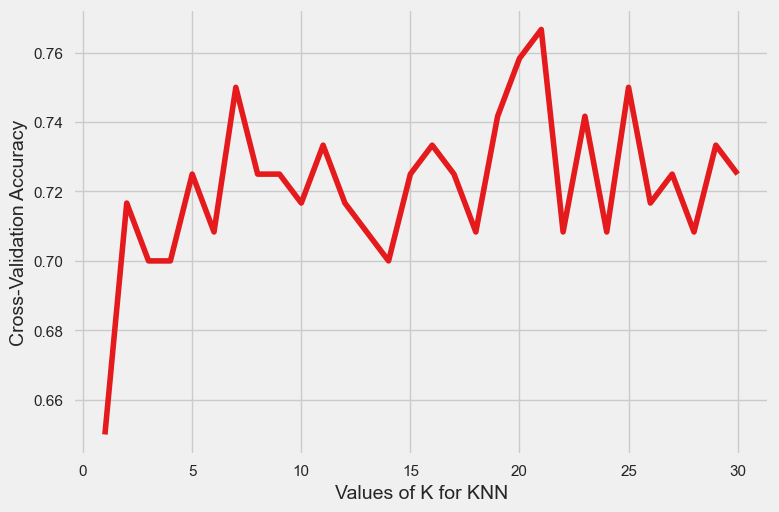

In [36]:
plt.plot(k_range, k_scores)
plt.xlabel('Values of K for KNN')
plt.ylabel('Cross-Validation Accuracy')

In [43]:
k_scores.index(max(k_scores)) + 1 

21

In [46]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_21 = KNeighborsClassifier(n_neighbors=21)

knn_3.fit(X_train,y_train)
knn_21.fit(X_train,y_train)

y_pred_knn_3 = knn_3.predict(X_test)
y_pred_knn_21 = knn_21.predict(X_test)

print(f"Classification report for KNN with K=3")
print(classification_report(y_test, y_pred_knn_3))

print(f"Classification report for KNN with K=21")
print(classification_report(y_test, y_pred_knn_21))

Classification report for KNN with K=3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.58      0.78      0.67         9
           2       0.75      0.55      0.63        11

    accuracy                           0.77        30
   macro avg       0.78      0.77      0.77        30
weighted avg       0.78      0.77      0.76        30

Classification report for KNN with K=21
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.56      0.71         9
           2       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.91      0.85      0.85        30
weighted avg       0.90      0.87      0.86        30



# Grid search

AKA just try everything!

- `GridSearchCV`: More efficient hyperparameter tuning  
- Allows you to define a grid of hyperparameters that will be searched using $k$-fold cross-validation

In [50]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1,31))
weight_options = ['uniform', 'distance']


# create a parameter grid: map the parameter names to the values that should be searched 
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

# initialize the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid

# fit the grid with data
grid.fit(X_train, y_train)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [56]:
grid_result = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]
grid_result.head()

,mean_test_score,params
0,0.650000,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.650000,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.716667,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.650000,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.700000,"{'n_neighbors': 3, 'weights': 'uniform'}"


In [58]:
grid_result.iloc[grid_result.mean_test_score.idxmax()]


mean_test_score                                     0.766667
params             {'n_neighbors': 21, 'weights': 'uniform'}
Name: 40, dtype: object

<center>
    <img src='../img/class_6/gs.png' style='height:400px; float: center; margin: 0px 0px 0px 0px'>
</center>


- You can reduce computational expense using `RandomizedSearchCV`

- State-of-the-art algorithms for sampling hyperparameters: Optuna https://optuna.org/

# ⏪ Today's recap

- Ensemble Learning
    - Voting classifiers
    - Bagging
        - Random Forest
    - Boosting
        - AdaBoost
        - Gradient Boosting
        - XGBoost
    - Stacking
    
- Model selection and optimization
    - Hyperparameter tunning
        - Cross-Validation
        - Grid search

# 👮‍♀️ Misc:

- Self-graded quiz will be posted in the next hour
- 💪 Ungraded homework will be posted tonight or tomorrow morning
- Office hours **only** on Monday 6 PM PST (Zoom link is posted in Canvas) 

<center>
<img src='../img/all/bye.gif' style='height:400px;'> 
</center>

# Next class: 
- Unsupervised learning
    - K-means and distance metrics
    - Hierarchical clustering
    - PCA
- Model interpretation
- Farewell
    - Brief note on data literacy/data ethics
    - Student requests: https://forms.gle/5jLyPJDeJ7NjFNps7
    - End of the course survey